<a href="https://colab.research.google.com/github/rodrigosouza07/Dashboards/blob/master/Ljtaruma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
taruma = pd.read_excel('UsoConsumo.xlsx')
taruma.head()

,id,descricacao,secao,grupo,descricao grupo,operacao,descricao operacao,quantidade,valor liquido
0,101774,B.,ACOUGUE,ACOUGUE BOVINO,CARNES COMUM,1050,Baixa para uso e consumo,14,800
1,12257,FRANGO,ACOUGUE,A«OUGUE FRANGO,FRANGO CORTES,1050,Baixa para uso e consumo,11,712
2,12539,SUINO,ACOUGUE,ACOUGUE SUINO,CARNES SUINAS,1050,Baixa para uso e consumo,4,420
3,18848,COADOR DE CAFE CABO MAD M,BAZAR GERAL + TEXTIL,ACESSORIOS PARA CAFE,COADORES DE PANO,1050,Baixa para uso e consumo,1,0
4,40245,HAV BRASIL LOGO BRANCO 43/4 EXC,BAZAR GERAL + TEXTIL,CAL«ADOS,CHINELO ADULTO (ACIMA DE 33),1050,Baixa para uso e consumo,2,0


In [4]:
taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False)

,quantidade
secao,
LIMPEZA,1251
MERCEARIA SECA,631
MERCEARIA DOCE,599
PERECIVEIS,362
HORTIFRUTI,330
PADARIA,330
MERCEARIA SALGADA,308
BAZAR GERAL + TEXTIL,259
BEBIDAS,230


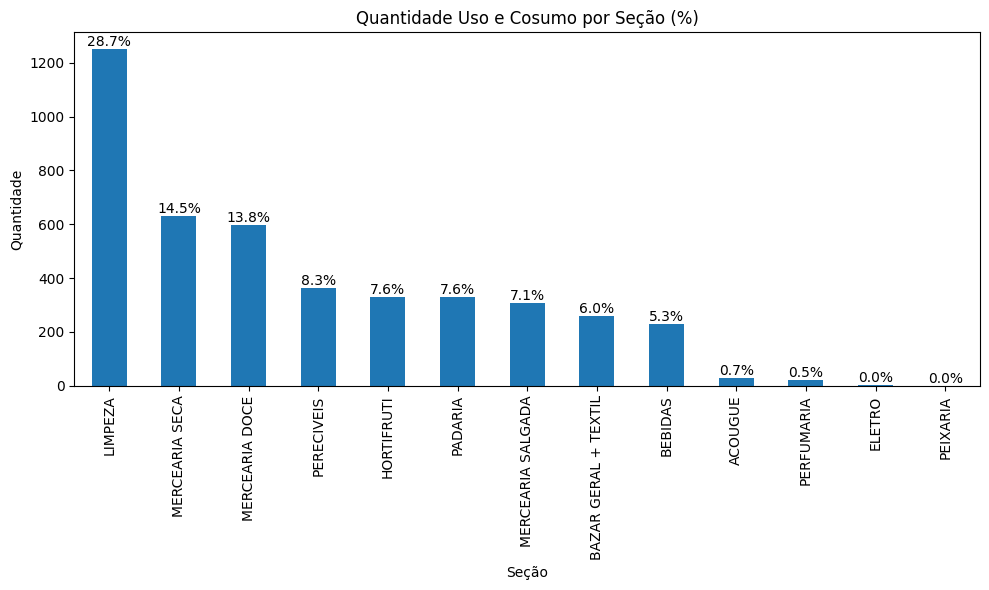

In [5]:
ax = taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

# Adiciona porcentagem em cada barra
total = taruma['quantidade'].sum()
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Cosumo por Seção (%)')
plt.tight_layout()
plt.show()

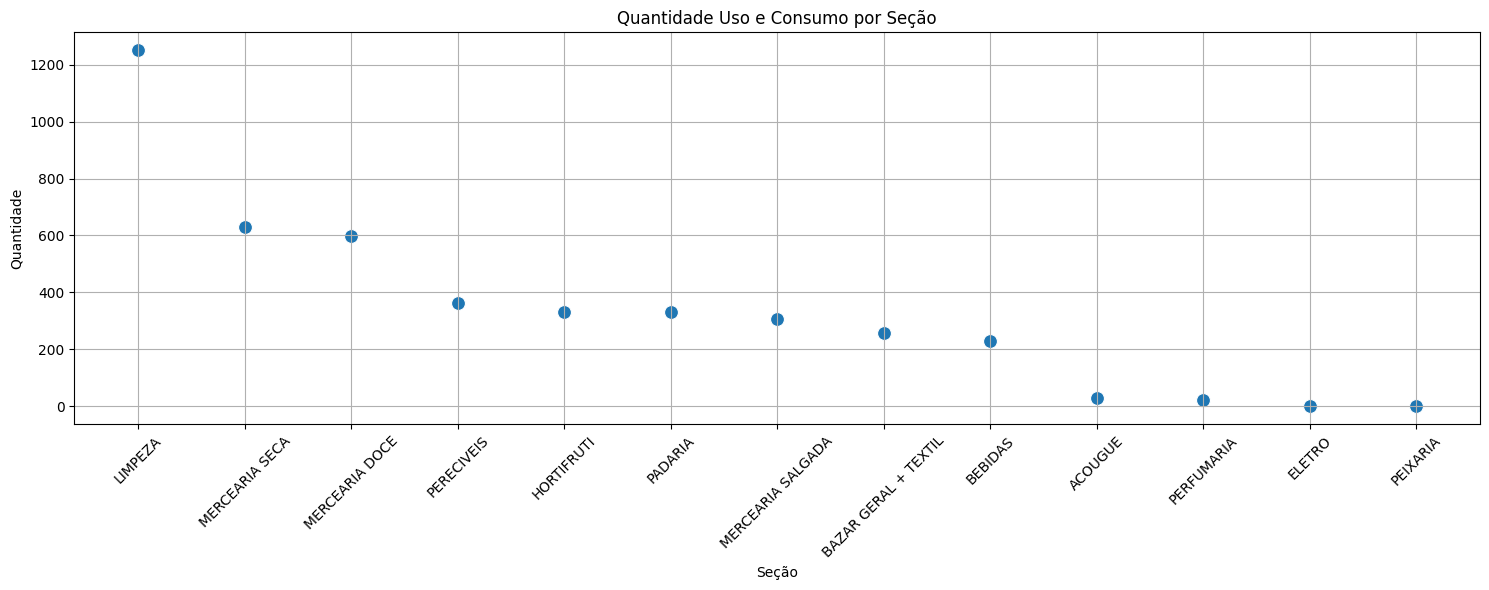

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

secao_quantidade = taruma.groupby('secao')['quantidade'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
sns.scatterplot(x=secao_quantidade.index, y=secao_quantidade.values, s=100)
plt.ylabel('Quantidade')
plt.xlabel('Seção')
plt.title('Quantidade Uso e Consumo por Seção')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
taruma.groupby('secao') ['valor liquido'].sum().sort_values(ascending=False)

,valor liquido
secao,
PERECIVEIS,6224
HORTIFRUTI,4828
ACOUGUE,1932
PADARIA,1002
PEIXARIA,568
ELETRO,0
BEBIDAS,0
BAZAR GERAL + TEXTIL,0
LIMPEZA,0


In [8]:
taruma.groupby('secao')['valor liquido'].sum().sort_values(ascending=False)

,valor liquido
secao,
PERECIVEIS,6224
HORTIFRUTI,4828
ACOUGUE,1932
PADARIA,1002
PEIXARIA,568
ELETRO,0
BEBIDAS,0
BAZAR GERAL + TEXTIL,0
LIMPEZA,0


In [12]:
# Calcular o total de valor líquido
total_valor_liquido = secao_valor_liquido.sum()

# Criar o gráfico de barras
ax = secao_valor_liquido.plot(kind='bar', figsize=(10, 6))

# Adicionar porcentagem em cada barra
for p in ax.patches:
    percentage = 100 * p.get_height() / total_valor_liquido
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.ylabel('Valor Líquido')
plt.xlabel('Seção')
plt.title('Percentual de Valor Líquido por Seção')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'secao_valor_liquido' is not defined

## Análise por grupo (quantidade)

Agrupar os dados por `grupo` e somar a `quantidade` para ver quais grupos de produtos têm as maiores quantidades.


In [13]:
grupo_quantidade = taruma.groupby('grupo')['quantidade'].sum().sort_values(ascending=False)
print(grupo_quantidade)

grupo
MATINAIS                           511
ACUCAR                             502
LIMPEZA CASEIRA                    426
LIMPEZA DE COZINHA                 395
LAVANDERIA (ROUPAS)                282
FRUTAS                             247
PADARIA TERCEIROS                  188
CONGELADOS                         168
NAO ALCOOLICAS                     154
LATICINIOS                         148
CONSERVAS                          147
DESCARTAVEIS                       136
TEMPEROS                           103
FARINACEOS                         103
LANCHONETE                         100
LIMPEZA DA CASA                     94
REFRIGERANTES                       75
VERDURAS                            75
MASSAS                              50
LIMPEZA DE BANHEIROS                42
PAD. PRODUTO TERCEIROS              40
LINHA DIET/LIGHT                    35
FESTAS                              34
ESPONJAS                            33
FRIAMBRERIA                         32
SAL                

## Visualização por grupo (quantidade)

Criar um gráfico de barras para visualizar a quantidade por `grupo`.


**Reasoning**:
Create a bar plot to visualize the quantity by 'grupo' using the `grupo_quantidade` Series.



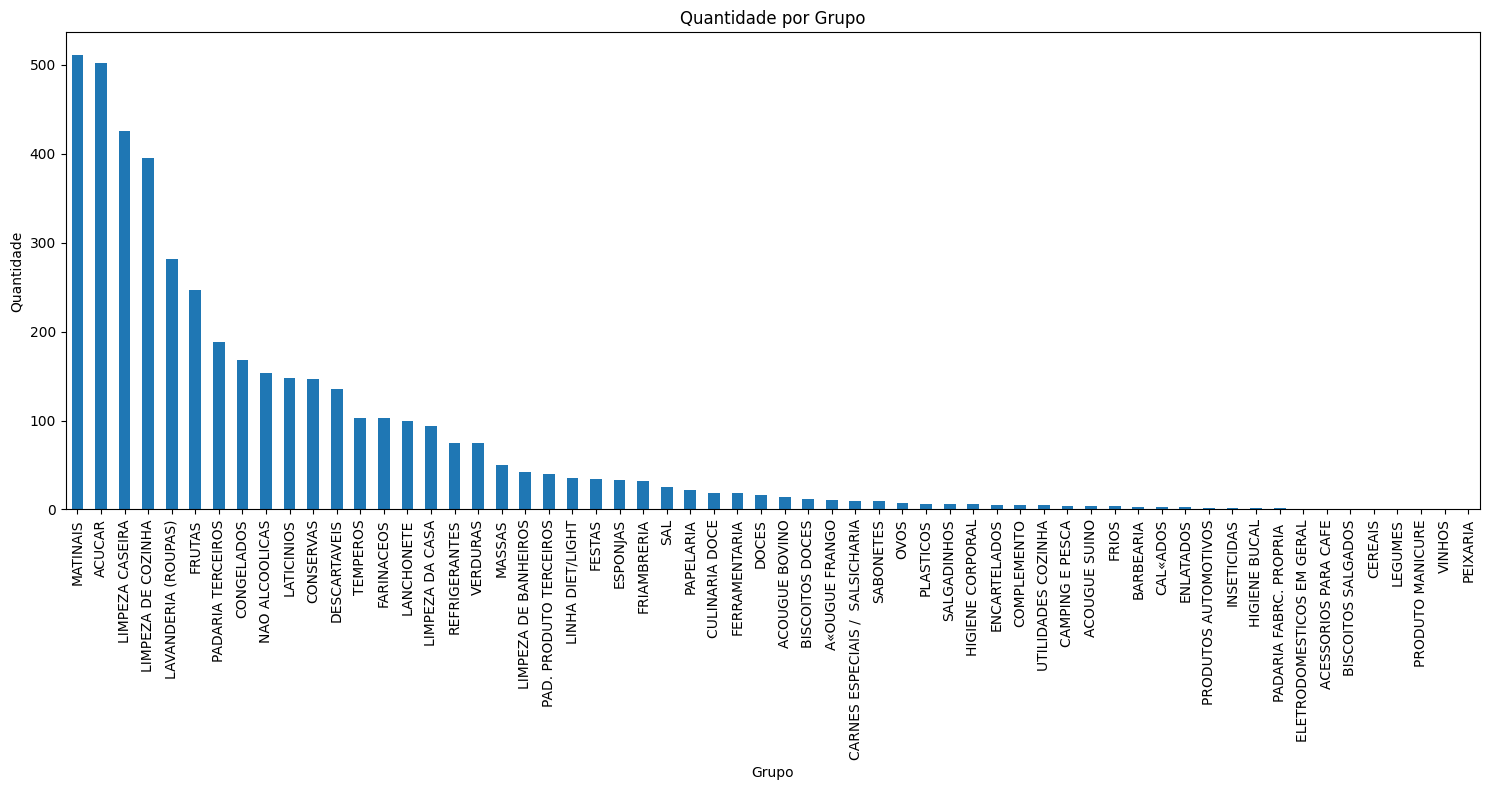

In [14]:
plt.figure(figsize=(15, 8))
ax = grupo_quantidade.plot(kind='bar')
plt.ylabel('Quantidade')
plt.xlabel('Grupo')
plt.title('Quantidade por Grupo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Análise por grupo (valor líquido)

Agrupar os dados por `grupo` e somar o `valor liquido` para ver quais grupos de produtos têm os maiores valores líquidos.


**Reasoning**:
Group the DataFrame by 'grupo', sum the 'valor liquido', sort in descending order, and store in a new variable.



In [15]:
grupo_valor_liquido = taruma.groupby('grupo')['valor liquido'].sum().sort_values(ascending=False)
print(grupo_valor_liquido)

grupo
CARNES ESPECIAIS /  SALSICHARIA    3120
FRIAMBRERIA                        3104
LEGUMES                            2492
FRUTAS                             1674
PADARIA TERCEIROS                   884
ACOUGUE BOVINO                      800
A«OUGUE FRANGO                      712
VERDURAS                            662
PEIXARIA                            568
ACOUGUE SUINO                       420
PADARIA FABRC. PROPRIA              118
ACUCAR                                0
CEREAIS                               0
CAMPING E PESCA                       0
COMPLEMENTO                           0
CONGELADOS                            0
DESCARTAVEIS                          0
DOCES                                 0
CONSERVAS                             0
CULINARIA DOCE                        0
ENCARTELADOS                          0
ELETRODOMESTICOS EM GERAL             0
ENLATADOS                             0
ACESSORIOS PARA CAFE                  0
BISCOITOS SALGADOS                

## Visualização por grupo (valor líquido)

Criar um gráfico de barras para visualizar o valor líquido por `grupo`.


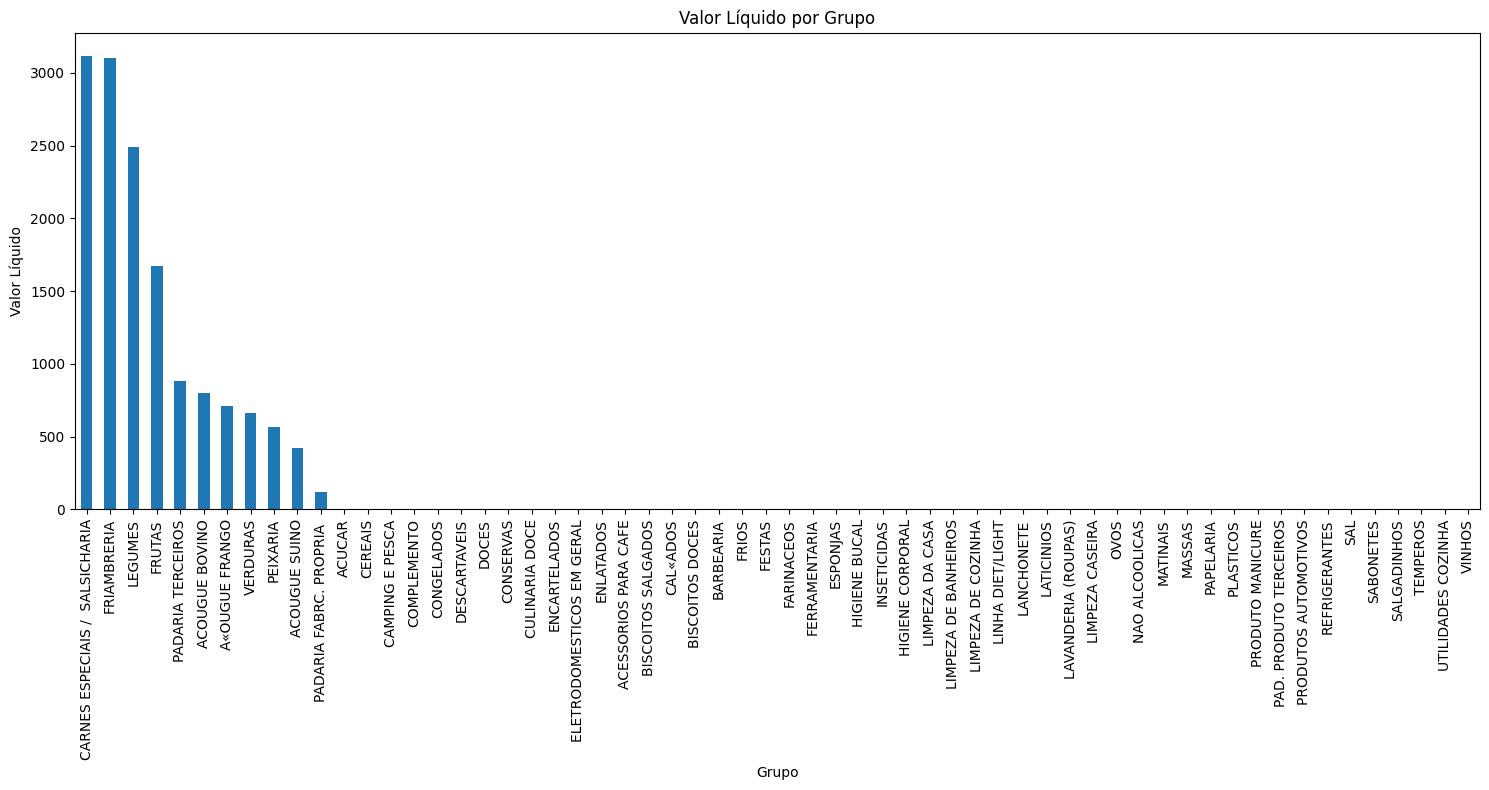

In [16]:
plt.figure(figsize=(15, 8))
ax = grupo_valor_liquido.plot(kind='bar')
plt.ylabel('Valor Líquido')
plt.xlabel('Grupo')
plt.title('Valor Líquido por Grupo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Análise por descrição grupo (quantidade)

Agrupar os dados por `descricao grupo` e somar a `quantidade`.


**Reasoning**:
Group the data by 'descricao grupo', sum the 'quantidade', sort in descending order, and store in `descricao_grupo_quantidade`.



In [17]:
descricao_grupo_quantidade = taruma.groupby('descricao grupo')['quantidade'].sum().sort_values(ascending=False)
print(descricao_grupo_quantidade)

descricao grupo
ACUCAR CRISTAL                 500
CAFE EM PO 250G                413
DETERGENTES LIQUIDOS  E GEL    352
ACESSORIOS LIMPEZA DE CASA     264
AGUA SANITARIA                 227
                              ... 
REFRIGERANTE LATA                1
SALGADINHOS SABORES              1
SOPAS                            1
VINHO NACIONAL                   1
FRUTOS DO MAR                    0
Name: quantidade, Length: 155, dtype: int64


## Visualização por descrição grupo (quantidade)

Criar um gráfico de barras para visualizar a quantidade por `descricao grupo`.


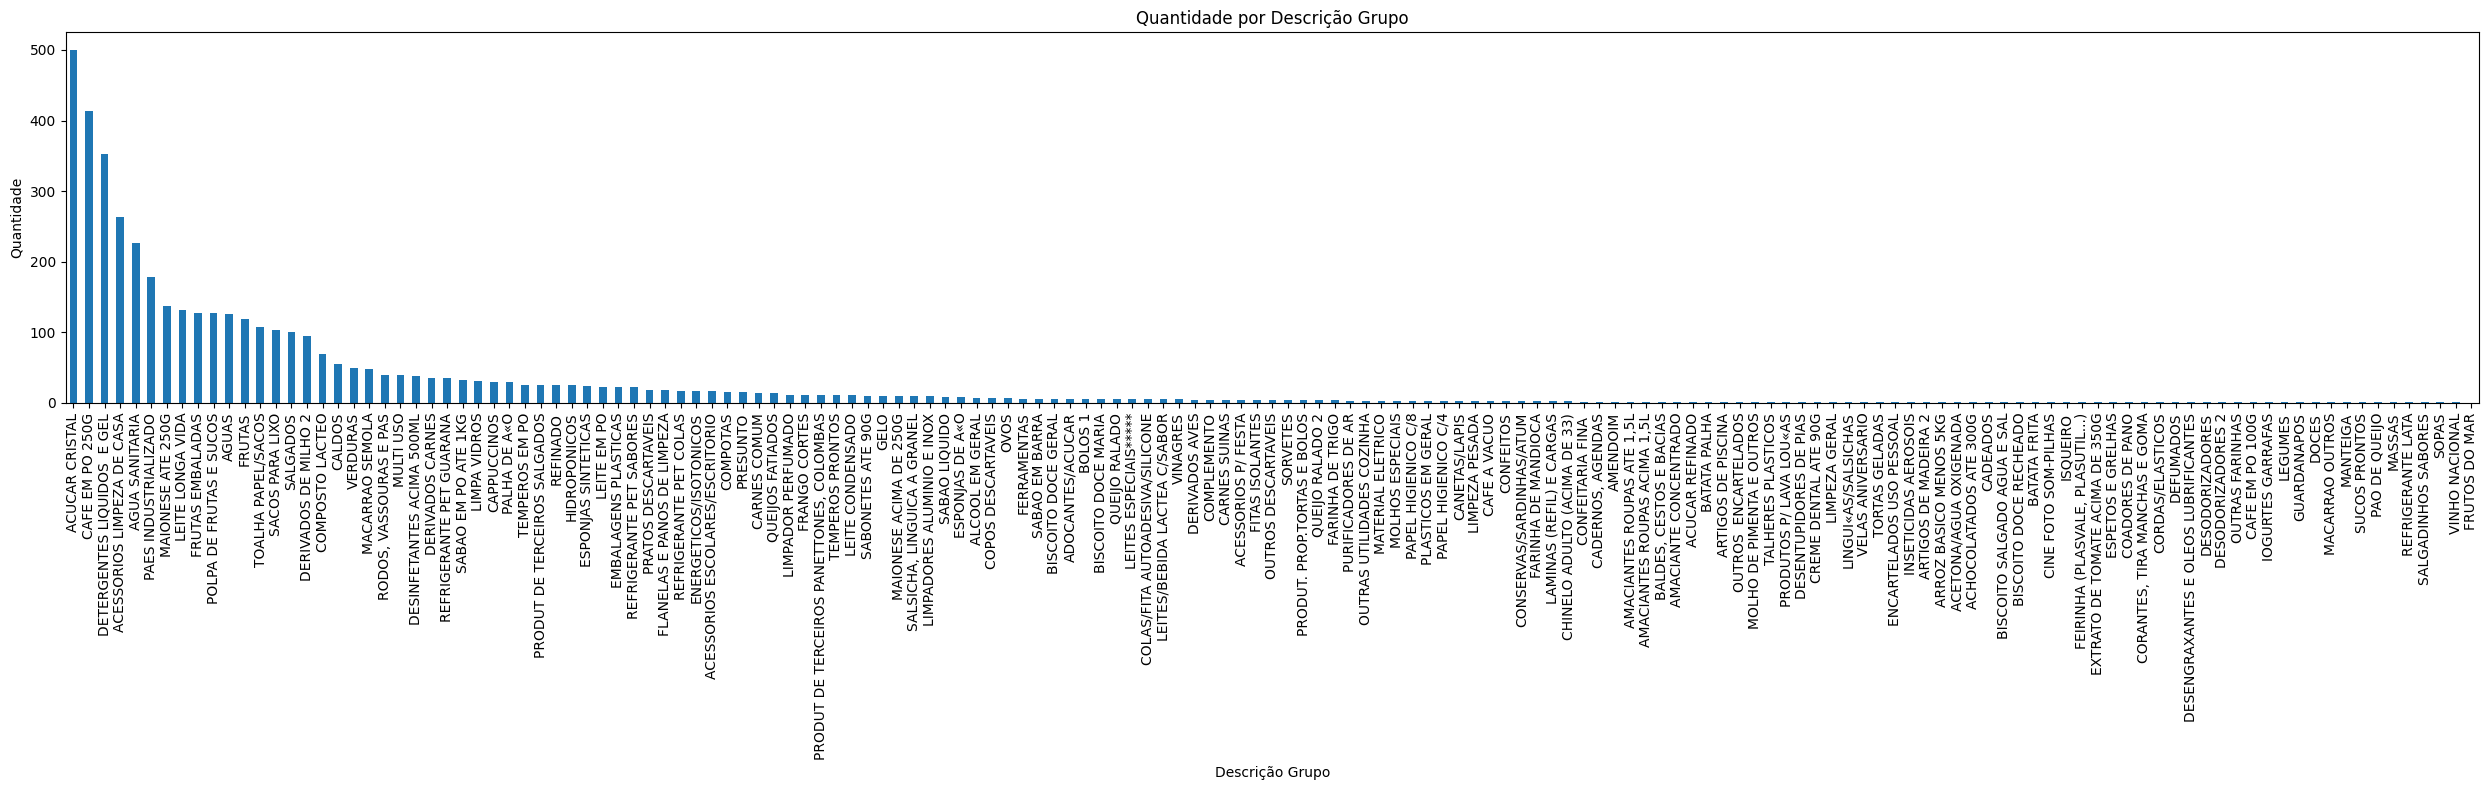

In [20]:
plt.figure(figsize=(25, 8))
ax = descricao_grupo_quantidade.plot(kind='bar')
plt.ylabel('Quantidade')
plt.xlabel('Descrição Grupo')
plt.title('Quantidade por Descrição Grupo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Análise por descrição grupo (valor líquido)

Agrupar os dados por `descricao grupo` e somar o `valor liquido`.


In [21]:
descricao_grupo_valor_liquido = taruma.groupby('descricao grupo')['valor liquido'].sum().sort_values(ascending=False)
print(descricao_grupo_valor_liquido)

descricao grupo
SALSICHA, LINGUICA A GRANEL    3120
LEGUMES                        2492
QUEIJOS FATIADOS               1266
FRUTAS                         1192
LINGUI«AS/SALSICHAS             948
                               ... 
TEMPEROS PRONTOS                  0
TORTAS GELADAS                    0
VELAS ANIVERSARIO                 0
VINAGRES                          0
VINHO NACIONAL                    0
Name: valor liquido, Length: 155, dtype: int64


## Visualização por descrição grupo (valor líquido)

Criar um gráfico de barras para visualizar o valor líquido por `descricao grupo`.


**Reasoning**:
Create a bar plot to visualize the net value by 'descricao grupo' as per the instructions.



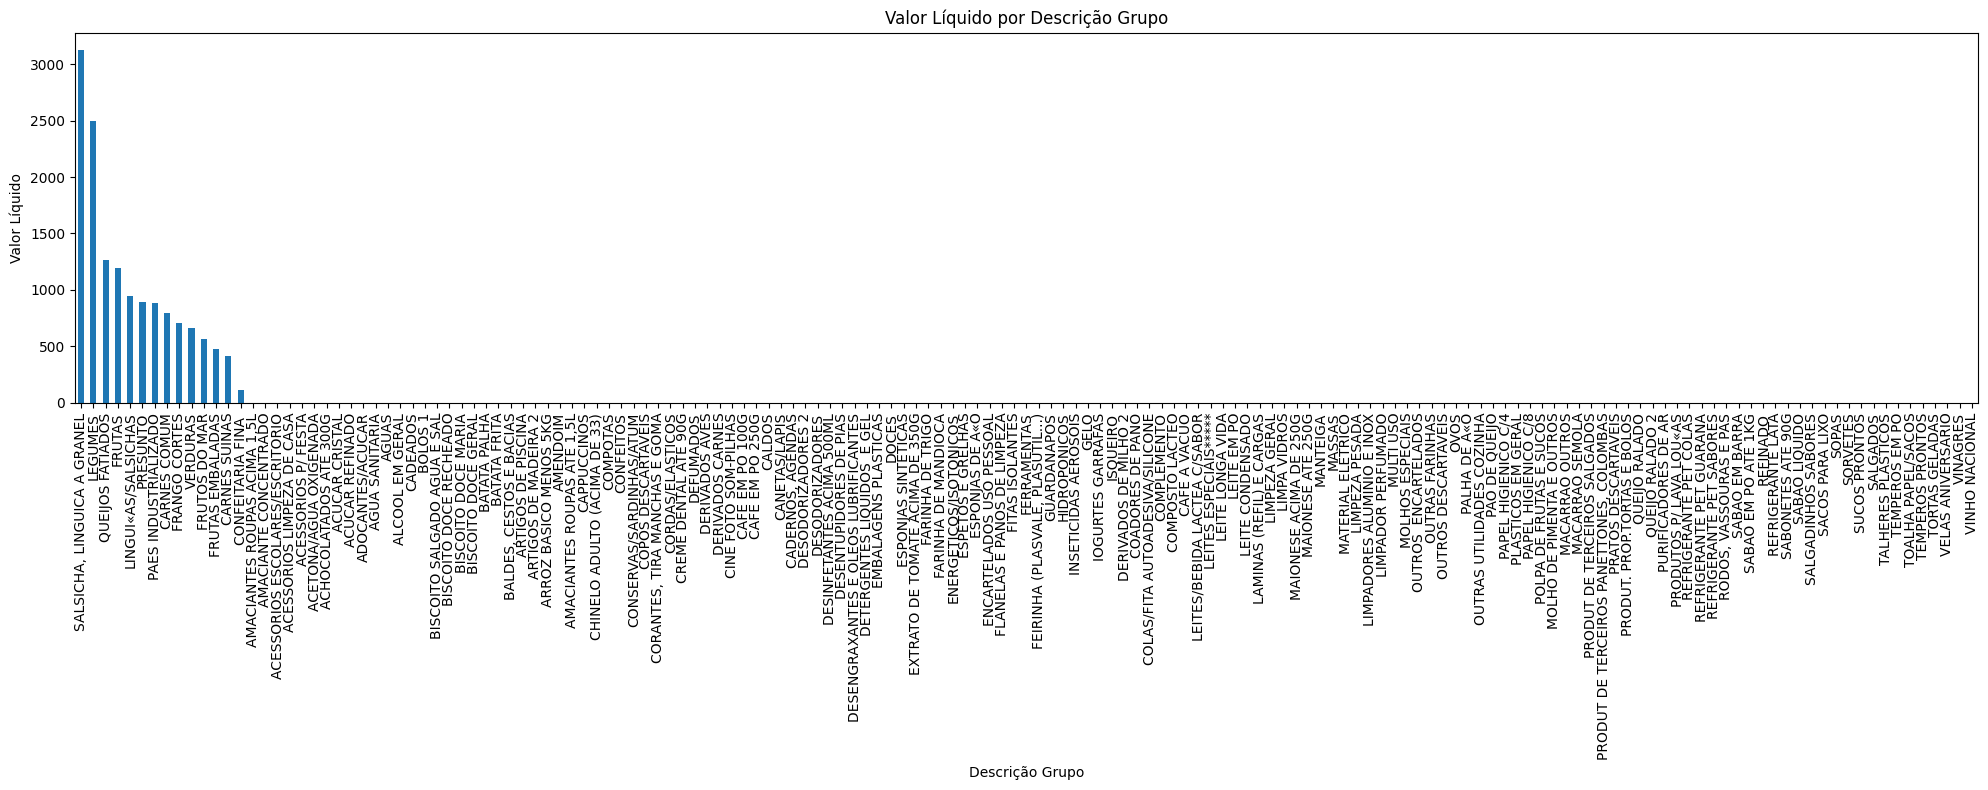

In [22]:
plt.figure(figsize=(20, 8))
ax = descricao_grupo_valor_liquido.plot(kind='bar')
plt.ylabel('Valor Líquido')
plt.xlabel('Descrição Grupo')
plt.title('Valor Líquido por Descrição Grupo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Resumo:



Principais Resultados da Análise de Dados
Os principais grupos de produtos por quantidade são MATINAIS, AÇÚCAR e LIMPEZA CASEIRA.
Os principais grupos de produtos por valor líquido são CARNES ESPECIAIS / SALSICHARIA, FRIAMBRERIA e LEGUMES.
Ao analisar as descrições de grupos mais granulares, as principais descrições por quantidade incluem AÇÚCAR CRISTAL e CAFÉ EM PO 250G.
A principal descrição de grupo por valor líquido é SALSICHA, LINGUIÇA A GRANEL.
Vários grupos de produtos têm valor líquido 0, sugerindo que não há vendas ou valor líquido registrados para esses produtos no conjunto de dados.
Insights ou Próximos Passos
Investigue os grupos de produtos com valor líquido 0 para entender se há problemas no registro de dados ou se esses produtos realmente não tiveram contribuição para o valor líquido durante o período analisado.
Analise a correlação entre a quantidade vendida e o valor líquido para diferentes grupos para identificar itens de alto volume e baixo valor versus itens de baixo volume e alto valor.